## Exercises

**Sample datasets**

- Singlg-band image (DEM): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Multispectral image (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

**Exercise 1: Reading and Exploring Raster Data**

1. Open the single-band DEM image using `rasterio`.
2. Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.
3. Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.

In [2]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())
# os.chdir("GIS Tutorials/Geog-312/Geog-312/2.Rasterio")
# print(os.getcwd())

G:\My Drive\Clark\GIS Tutorials\Geog-312\Geog-312\2.Rasterio


In [3]:
# 1. Open the single-band DEM image using `rasterio`.
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [4]:
# 2. Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.
print("Name:", src.name)
print("Mode:", src.mode)
print("Metadata:", src.meta)
print("CRS:", src.crs)
print("Resolution:", src.res)

Name: https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
Mode: r
Metadata: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)}
CRS: EPSG:3857
Resolution: (90.0, 89.99579177642138)


In [5]:
# 3. Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.
print("Width:", src.width)
print("Height:", src.height)
print("Bounds:", src.bounds)
print("Datatype:", src.dtypes)

Width: 4269
Height: 3113
Bounds: BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)
Datatype: ('int16',)


**Exercise 2: Visualizing and Manipulating Raster Bands**

1. Visualize the single-band DEM using a custom colormap (e.g., cmap='terrain').
2. Open the multispectral image and visualize the first band using a suitable colormap.
3. Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

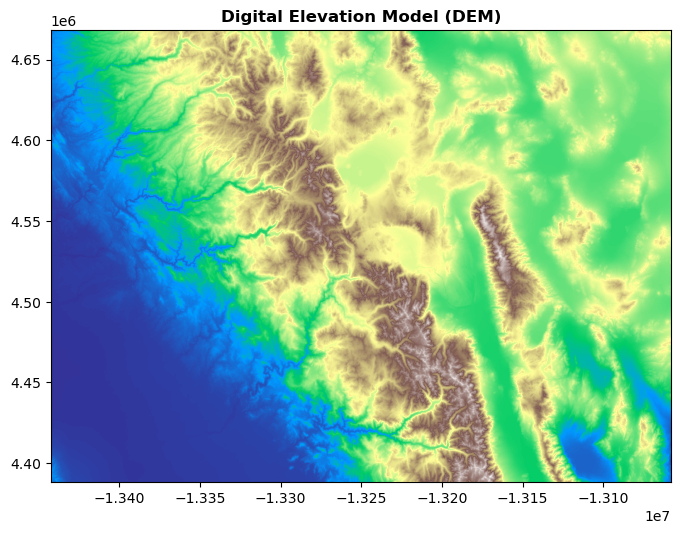

In [6]:
# 1. Visualize the single-band DEM using a custom colormap (e.g., cmap='terrain').
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228)}
<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/cog.tif' mode='r'>
Bands available in the raster: (1, 2, 3, 4)


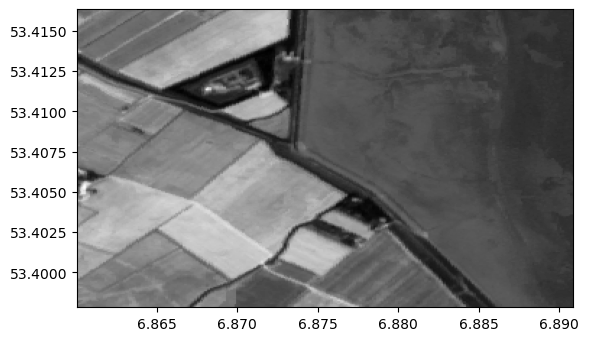

<Axes: >

In [7]:
# 2. Open the multispectral image and visualize the first band using a suitable colormap.
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
src = rasterio.open(raster_path)
print("Metadata:", src.meta)
print(src)
print(f"Bands available in the raster: {src.indexes}")
rasterio.plot.show((src, 1), cmap="Greys_r")

In [8]:
band_names = ["Blue", "Green", "Red", "NIR"]

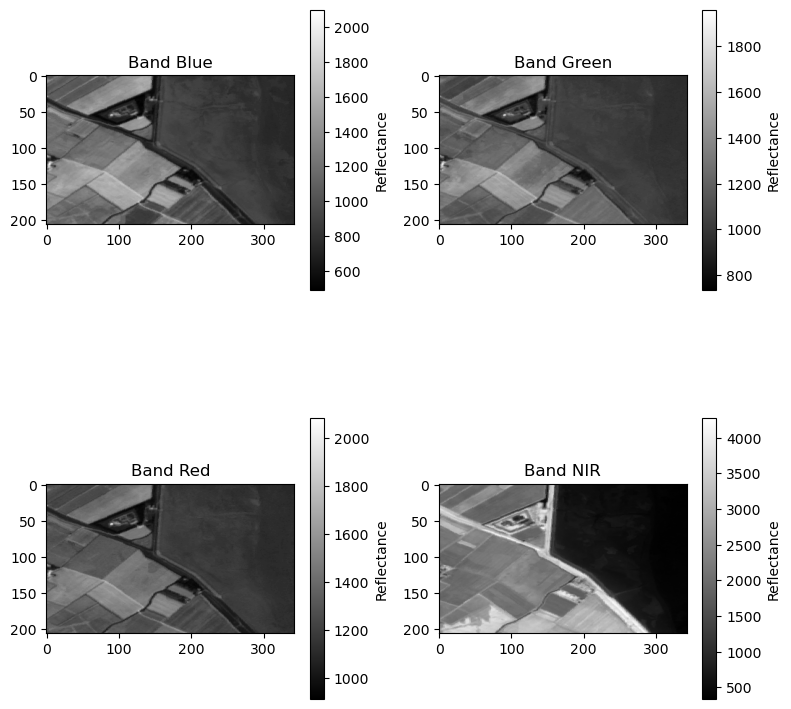

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count+1):
    data = src.read(band)
    ax = axes[band-1]
    im = ax.imshow(data, cmap="gray")
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

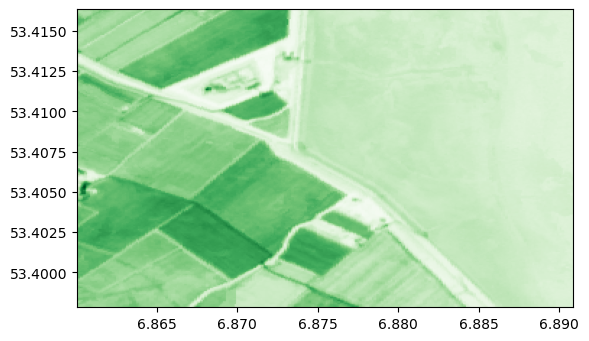

<Axes: >

In [10]:
rasterio.plot.show((src, 1), cmap="Greens")

In [11]:
# Loop through all bands and print their min and max values
for band in range(1, src.count + 1):  # Loop through all bands (1-based index)
    data = src.read(band)  # Read the data for the current band
    min_val = data.min()   # Get the minimum value of the band
    max_val = data.max()   # Get the maximum value of the band
    print(f"Band {band}: Min = {min_val}, Max = {max_val}")

Band 1: Min = 488.0, Max = 2102.0
Band 2: Min = 735.0, Max = 1960.0
Band 3: Min = 913.5, Max = 2083.0
Band 4: Min = 336.5, Max = 4269.0


In [12]:
# # 3. Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.


# # This is a non-programmatic way to do it. normalizing each band individually
# # Though actually in this case it does not make a huge difference

# nir_band = src.read(4)
# red_band = src.read(3)
# green_band = src.read(2)
# blue_band = src.read(1)

# # Normalize each band to 0-255 range for display purposes
# def normalize_band(band):
#     return ((band - band.min()) / (band.max() - band.min()) * 255).astype(np.uint8)

# # Normalize the bands
# nir_band_norm = normalize_band(nir_band)
# red_band_norm = normalize_band(red_band)
# green_band_norm = normalize_band(green_band)
# blue_band_norm = normalize_band(blue_band)

# # Stack the bands into a single array
# rgb = np.dstack((red_band_norm, green_band_norm, blue_band_norm))

# # Plot the array in RGB
# plt.figure(figsize=(8, 8))
# plt.imshow(rgb)
# plt.title("TCC")
# plt.show()


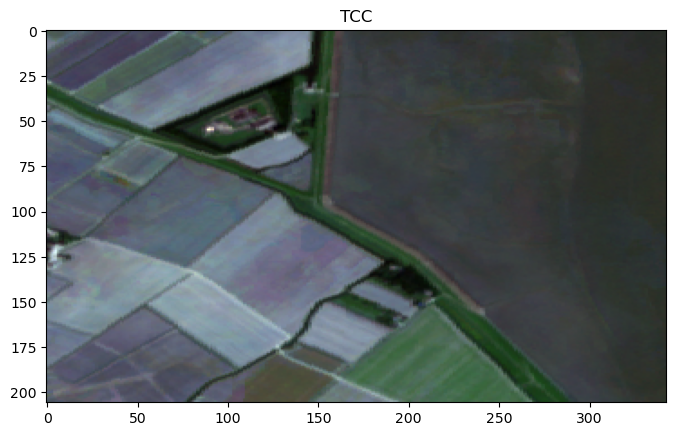

In [13]:
# 3. Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

# Read all the bands at once
raster_data = src.read([1, 2, 3, 4])  # Reading bands 2, 3, and 4 (RGB bands)

# Pull out non-normalized bands, to be used in band ratios
nir_band = raster_data[3]
red_band = raster_data[2]
green_band = raster_data[1]
blue_band = raster_data[0]

# Normalize each band independently to 0-255 range
def normalize_band(band):
    return ((band - band.min()) / (band.max() - band.min()) * 255).astype(np.uint8)

# Normalize each band in the raster stack
normalized_raster = np.array([normalize_band(band) for band in raster_data])

# Extract the individual bands from the normalized stack
nir_band_norm = normalized_raster[3]
red_band_norm = normalized_raster[2]
green_band_norm = normalized_raster[1]
blue_band_norm = normalized_raster[0]

# Stack the bands into an rgb array and visualize
rgb = np.dstack((red_band_norm, green_band_norm, blue_band_norm))

# Plot the array in RGB
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("TCC")
plt.show()

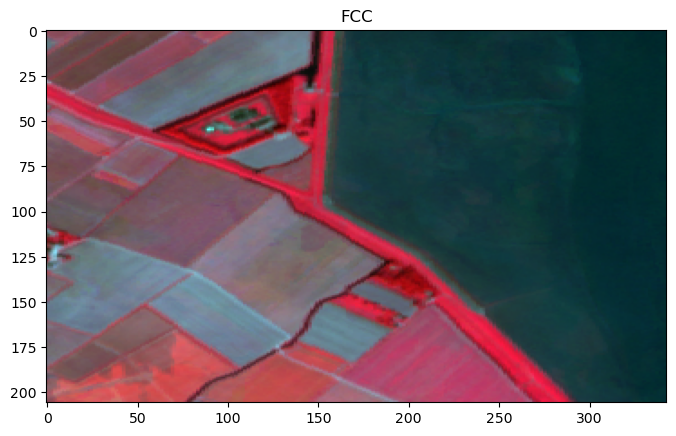

In [14]:
# Stack the bands into an FCC array and visualize
fcc = np.dstack((nir_band_norm, red_band_norm, green_band_norm))

# Plot the array in FCC
plt.figure(figsize=(8, 8))
plt.imshow(fcc)
plt.title("FCC")
plt.show()

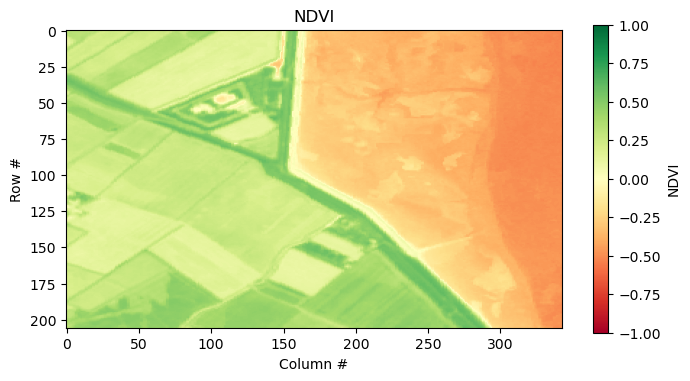

In [15]:
# For NDVI use non-normalized bands! It is a ratio
ndvi = (nir_band - red_band) / (nir_band + red_band + 0.000001)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

In [16]:
# Save the raster
with rasterio.open(
    "activityImages/image.tif",
    "w",
    driver="GTiff",
    height=raster_data.shape[1],
    width=raster_data.shape[2],
    count=raster_data.shape[0],
    dtype=raster_data.dtype,
    crs=src.crs,
    transform=src.transform,
    compress="lzw",
) as dst:
    dst.write(raster_data)

**Exercise 3: Raster Clipping with Array Indexing**|

1. Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).
2. Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.
3. Save the clipped raster subset to a new file named `clipped_multispectral.tif`.

In [17]:
# 1. Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).
data = src.read()
print(src.crs)
data.shape

EPSG:4326


(4, 206, 343)

In [18]:
subset = normalized_raster[:, 50:150, 150:250]
rgb_subset = np.dstack((subset[2], subset[1], subset[0]))
rgb_subset.shape

(100, 100, 3)

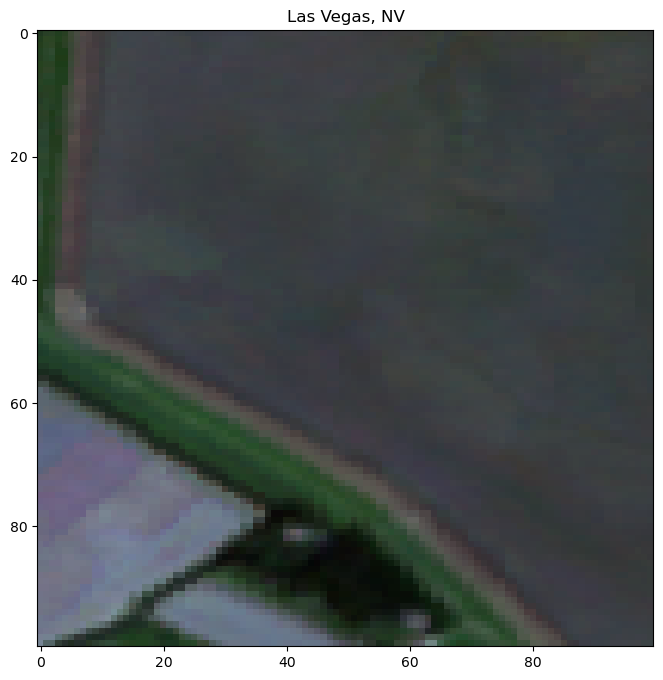

In [19]:
# 2. Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb_subset)
plt.title("Las Vegas, NV")
plt.show()

In [21]:
from rasterio.windows import Window
from rasterio.transform import from_bounds

# Assuming subset and src are already defined
# Define the window of the subset (replace with actual window coordinates)
window = Window(col_off=150, row_off=50, width=100, height=100)

# Calculate the bounds of the window
window_bounds = rasterio.windows.bounds(window, src.transform)

# Calculate the new transform based on the window bounds
new_transform = from_bounds(*window_bounds, window.width, window.height)

In [22]:
# 3. Save the clipped raster subset to a new file named `clipped_multispectral.tif`.
with rasterio.open(
    "activityImages/clipped_multispectral1.tif",
    "w",
    driver="GTiff",
    height=subset.shape[1],
    width=subset.shape[2],
    count=subset.shape[0],
    dtype=subset.dtype,
    crs=src.crs,
    transform=new_transform,
    compress="lzw",
) as dst:
    dst.write(subset)

**Exercise 4: Calculating NDWI (Band Math)**

1. Open the multispectral image and extract the Green and Near-Infrared (NIR) bands.
2. Compute the Normalized Difference Water Index ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) using the formula:

    NDWI= (Green - NIR) / (Green + NIR)

3. Visualize the NDWI result using a water-friendly colormap (e.g., cmap='Blues') to highlight water bodies.
4. Save the resulting NDWI image as a new raster file named ndwi.tif.

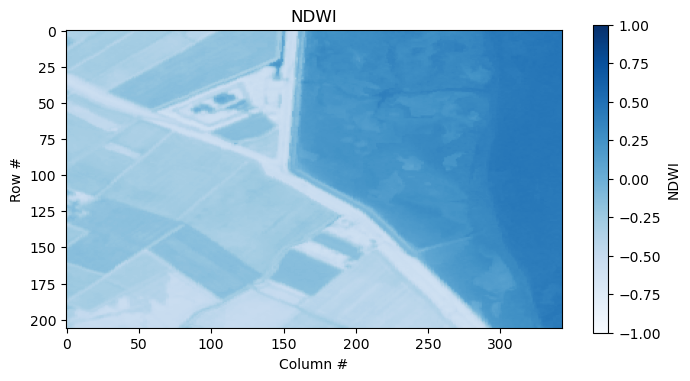

In [23]:
# 1. Open the multispectral image and extract the Green and Near-Infrared (NIR) bands.
# 2. Compute the Normalized Difference Water Index ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) using the formula:

#     NDWI= (Green - NIR) / (Green + NIR)

# 3. Visualize the NDWI result using a water-friendly colormap (e.g., cmap='Blues') to highlight water bodies.

# For NDWI use non-normalized bands! It is a ratio
ndwi = (green_band - nir_band) / (green_band + nir_band + 0.000001)

plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI", shrink=0.5)
plt.title("NDWI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

In [24]:
with rasterio.open(raster_path) as src:
    profile = src.profile
print(profile)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}


In [25]:
profile.update(dtype=rasterio.float32, count=1, compress="lzw")
print(profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 343, 'height': 206, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [26]:
# 4. Save the resulting NDWI image as a new raster file named ndwi.tif.
output_raster_path = "lessonImages/NDWI.tif"

with rasterio.open(output_raster_path, "w", **profile) as dst:
    dst.write(ndwi, 1)
print(f"Raster data has been written to {output_raster_path}")

Raster data has been written to lessonImages/NDWI.tif


**Exercise 5: Reprojecting Raster Data**

1. Reproject the single-band DEM raster from its original CRS to EPSG:4326 (WGS 84) using the `rasterio.warp.reproject` function.
2. Save the reprojected raster to a new GeoTIFF file named `reprojected_dem.tif`.
3. Visualize both the original and reprojected DEM datasets to compare how the reprojection affects the spatial coverage and resolution.

In [28]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

raster_path = "activityImages/dem_90m.tif"
dst_crs = "EPSG:4326"  # WGS 84
output_reprojected_path = "activityImages/reprojected_dem.tif"

with rasterio.open(raster_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )

    profile = src.profile
    profile.update(crs=dst_crs, transform=transform, width=width, height=height)

    with rasterio.open(output_reprojected_path, "w", **profile) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )
print(f"Reprojected raster saved at {output_reprojected_path}")

Reprojected raster saved at activityImages/reprojected_dem.tif


## Summary

Rasterio is a powerful and flexible tool for handling geospatial raster data in Python. Whether you are visualizing satellite imagery, performing raster math, or saving new datasets, it offers a convenient interface for working with raster data. The examples and exercises provided should help you gain hands-on experience with Rasterio, enabling you to work more confidently with geospatial data in various applications.